In [272]:
#pip install pyforest

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


data dict:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf


Hİnt for metric : Our mission to classify soldiers races via their body sclales. We want a balanced score for our predictions.

# Import libraries

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, f1_score, roc_auc_score
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import missingno as msno

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [274]:
# For checking missing values and missing percent

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [275]:
# To view summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [276]:
def shape_control():
    print('df.shape:', df.shape)
    print('X.shape:', X.shape)
    print('y.shape:', y.shape)
    print('X_train.shape:', X_train.shape)

# Ingest the data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [277]:
df0 = pd.read_csv('ANSUR II MALE Public.csv')
df0.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [278]:
df0.shape

(4082, 108)

In [279]:
df0.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [280]:
df1 = pd.read_csv('ANSUR II FEMALE Public.csv')
df1.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [281]:
df1.shape

(1986, 108)

In [282]:
df1.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [283]:
print(df0.columns==df1.columns)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [284]:
df0.columns = df0.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [285]:
df1.columns = df1.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [286]:
print(df0.columns==df1.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [287]:
df = df0.append(df1, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [288]:
df.shape

(6068, 108)

# EDA
Tips :
- Drop unnecessary columns
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
- Find unusual value in Weightlbs

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to writingpreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [290]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0000000,20757.1984179,13159.3908939,10027.0000000,14841.7500000,20063.5000000,27234.5000000,920103.0000000
abdominalextensiondepthsitting,6068.0000000,246.4686882,37.4001061,155.0000000,219.0000000,242.0000000,271.0000000,451.0000000
acromialheight,6068.0000000,1406.1613382,79.0910484,1115.0000000,1350.0000000,1410.0000000,1462.0000000,1683.0000000
acromionradialelength,6068.0000000,327.3744232,20.7200182,249.0000000,313.0000000,328.0000000,341.2500000,393.0000000
anklecircumference,6068.0000000,224.8913975,16.0518333,156.0000000,214.0000000,225.0000000,235.0000000,293.0000000
axillaheight,6068.0000000,1299.6087673,72.0222861,1038.0000000,1249.0000000,1302.0000000,1349.0000000,1553.0000000
balloffootcircumference,6068.0000000,244.1926500,16.8450202,186.0000000,232.0000000,245.0000000,256.0000000,306.0000000
balloffootlength,6068.0000000,194.7546144,13.5163681,151.0000000,185.0000000,195.0000000,204.0000000,245.0000000
biacromialbreadth,6068.0000000,399.2041859,30.2369141,283.0000000,376.0000000,404.0000000,421.0000000,489.0000000
bicepscircumferenceflexed,6068.0000000,340.9342452,41.5198658,216.0000000,311.0000000,341.0000000,370.0000000,490.0000000


In [291]:
df.nunique().sort_values()

gender                               2
writingpreference                    3
branch                               3
component                            3
dodrace                              7
installation                        12
earprotrusion                       22
earbreadth                          22
heightin                            29
earlength                           36
bimalleolarbreadth                  37
handbreadth                         38
age                                 42
heelbreadth                         42
subjectnumericrace                  44
tragiontopofhead                    46
lateralmalleolusheight              47
headbreadth                         48
footbreadthhorizontal               49
palmlength                          50
bizygomaticbreadth                  50
headlength                          55
mentonsellionlength                 55
interpupillarybreadth               56
shoulderlength                      78
wristcircumference       

In [292]:
df.duplicated().value_counts()

False    6068
dtype: int64

In [293]:
missing (df)

,Missing_Number,Missing_Percent
ethnicity,4647,0.7658207
subjectid,0,0.0000000
radialestylionlength,0,0.0000000
thighcircumference,0,0.0000000
tenthribheight,0,0.0000000
suprasternaleheight,0,0.0000000
stature,0,0.0000000
span,0,0.0000000
sleeveoutseam,0,0.0000000
sleevelengthspinewrist,0,0.0000000


In [294]:
df.ethnicity.value_counts(dropna=False)

NaN                                                   4647
Mexican                                                357
Puerto Rican                                           183
Caribbean Islander                                     124
Filipino                                                67
Cherokee                                                65
Korean                                                  53
Dominican                                               32
Chinese                                                 26
Japanese                                                22
Vietnamese                                              21
Cuban                                                   17
Arab or Middle Eastern                                  17
Colombian                                               17
Salvadoran                                              16
East/Asian Indian                                       13
Samoan                                                  

In [295]:
#df.corr().style.background_gradient(cmap='RdPu')

In [296]:
(df.subjectnumericrace==df.dodrace).value_counts()

True     5262
False     806
dtype: int64

In [297]:
(df.subjectnumericrace==df.dodrace)>8

0       False
1       False
2       False
3       False
4       False
        ...  
6063    False
6064    False
6065    False
6066    False
6067    False
Length: 6068, dtype: bool

In [298]:
df[df["subjectnumericrace"]>8][["subjectnumericrace","dodrace"]]

,subjectnumericrace,dodrace
10,351,1
27,61,1
36,61,1
56,28,2
71,28,2
79,21,2
111,41,4
118,31,3
120,641,4
126,23,2


In [299]:
df.subjectnumericrace.unique()

array([    1,     2,   351,     3,    61,     4,    28,     5,    21,
          41,    31,   641,    23,     8,   251,    38,     6,    51,
          18,    64,   318,    63,    25,    43,   423,    35,   425,
         235,   358,    62,    42,   451,   238,  4251,   431,  2518,
         218,   231,   428,   651,   631,    48,  2351, 42351],
      dtype=int64)

In [300]:
df.subjectnumericrace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
18         18
5          18
25         14
351        10
38          9
35          8
62          8
64          8
63          7
42          7
231         6
43          5
235         4
218         3
651         2
423         2
451         2
431         2
318         2
2351        2
641         2
2518        2
631         1
238         1
358         1
425         1
4251        1
428         1
48          1
42351       1
Name: subjectnumericrace, dtype: int64

In [301]:
df.dodrace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [302]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

**Drop unnecessary columns**

In [303]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [304]:
drop_columns = ["subjectnumericrace",
                "subjectid",
                "date",
                "installation",
                "component",
                "branch",
                "primarymos",
                "subjectsbirthlocation",
                "ethnicity",
                "age",
                "writingpreference"]

In [305]:
df.drop(drop_columns, inplace=True, axis=1)

In [306]:
df.shape

(6068, 97)

In [307]:
missing (df)

,Missing_Number,Missing_Percent
abdominalextensiondepthsitting,0,0.0000000
hipbreadth,0,0.0000000
sleevelengthspinewrist,0,0.0000000
sittingheight,0,0.0000000
shoulderlength,0,0.0000000
shoulderelbowlength,0,0.0000000
shouldercircumference,0,0.0000000
radialestylionlength,0,0.0000000
poplitealheight,0,0.0000000
palmlength,0,0.0000000


# The Examination of Target Variable

In [308]:
df['dodrace'].describe()

count   6068.0000000
mean       1.6150297
std        0.9791555
min        1.0000000
25%        1.0000000
50%        1.0000000
75%        2.0000000
max        8.0000000
Name: dodrace, dtype: float64

In [309]:
df['dodrace'].mode()

0    1
dtype: int64

In [310]:
df['dodrace'].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

**Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)**                                            

In [311]:
(df['dodrace'].value_counts()<500)

1    False
2    False
3    False
4     True
6     True
5     True
8     True
Name: dodrace, dtype: bool

In [312]:
df.drop(df[df['dodrace']==4].index, inplace = True)

In [313]:
df.drop(df[df['dodrace']==5].index, inplace = True)

In [314]:
df.drop(df[df['dodrace']==6].index, inplace = True)

In [315]:
df.drop(df[df['dodrace']==8].index, inplace = True)

In [316]:
df['dodrace'].value_counts()

1    3792
2    1298
3     679
Name: dodrace, dtype: int64

In [317]:
df.shape

(5769, 97)

In [318]:
print( f"Skewness: {df['dodrace'].skew()}")

Skewness: 1.1910922146959462


In [319]:
#df['dodrace'].iplot(kind='hist')

In [320]:
numerical= df.drop(['dodrace'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', '

**Find unusual value in Weightlbs**

In [321]:
df["weightlbs"].describe()

count   5769.0000000
mean     175.5782631
std       33.6004789
min        0.0000000
25%      150.0000000
50%      175.0000000
75%      197.0000000
max      321.0000000
Name: weightlbs, dtype: float64

In [322]:
df["weightlbs"].value_counts().index.sort_values()

Int64Index([  0,  86,  88,  90,  95,  96,  98, 100, 101, 102,
            ...
            283, 285, 290, 292, 293, 295, 300, 310, 315, 321],
           dtype='int64', length=188)

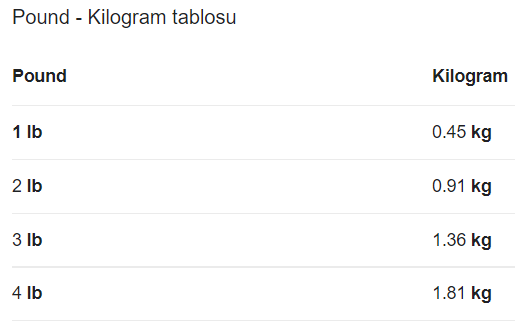

In [323]:
df["weightkg"].describe()

count   5769.0000000
mean     800.9811059
std      155.9903382
min      358.0000000
25%      686.0000000
50%      790.0000000
75%      900.0000000
max     1442.0000000
Name: weightkg, dtype: float64

In [324]:
df["weightkg"].value_counts().index.sort_values()

Int64Index([ 358,  393,  400,  428,  430,  431,  432,  435,  442,  444,
            ...
            1345, 1346, 1354, 1369, 1371, 1375, 1400, 1413, 1429, 1442],
           dtype='int64', length=774)

In [325]:
df.drop("weightlbs", inplace=True, axis=1)

In [326]:
df.shape

(5769, 96)

In [327]:
# "weightlbs" sütununda yanlış veriler var. bu nedenle düşüldü. def fonksiyonu ve apply değerlendir.

In [328]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,dodrace,heightin
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,1,71
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,1,68
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,2,68
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,1,66
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,2,77


### Categorical Features

**gender & dodrace**

In [329]:
first_looking("gender")

column name    :  gender
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Male      3899
Female    1870
Name: gender, dtype: int64


In [330]:
print(df.groupby('gender')['dodrace'].mean().sort_values())
print()
df.groupby('gender')['dodrace'].mean().iplot(kind='histogram',subplots=True,bins=50)

gender
Male     1.3903565
Female   1.6064171
Name: dodrace, dtype: float64



In [331]:
#df.corr().style.background_gradient(cmap='RdPu')

In [332]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    print(dataset)

In [333]:
correlation(df, 0.9)

      abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  balloffootcircumference  

In [334]:
#df.corr().style.background_gradient(cmap='RdPu')

In [335]:
df.shape

(5769, 60)

# Dummy Operations

In [336]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [337]:
df.shape

(5769, 60)

In [338]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'calfcircumference',
       'chestbreadth', 'chestcircumference', 'chestdepth',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'forearmcenterofgriplength', 'functionalleglength', 'handbreadth',
       'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heelanklecircumference', 'heelbreadth', 'hipbreadthsitting',
       'interpupillarybreadth', 'interscyei', 'lateralfemoralepicondyleheight',
       'latera

In [339]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,calfcircumference,chestbreadth,chestcircumference,chestdepth,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,functionalleglength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadthsitting,interpupillarybreadth,interscyei,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,overheadfingertipreachsitting,palmlength,shoulderlength,sleevelengthspinewrist,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistfrontlengthsitting,wristcircumference,dodrace,gender_Male
0,266,1467,337,222,253,202,401,369,274,493,71,319,291,142,979,240,882,619,373,291,1074,259,607,351,36,71,19,247,802,349,1136,90,193,150,583,206,326,70,366,685,422,500,77,391,118,400,1447,113,145,883,164,786,140,1700,501,329,440,175,1,1
1,233,1395,326,220,245,193,394,338,257,479,67,344,320,135,944,232,870,584,357,269,1021,253,615,376,33,62,18,232,781,348,1096,86,195,146,568,201,334,72,356,620,441,488,73,371,131,380,1380,118,141,868,169,822,120,1627,432,316,371,167,1,1
2,287,1430,341,230,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,412,288,1120,267,636,359,40,61,23,237,810,355,1115,93,203,148,573,202,356,70,393,665,462,482,72,409,123,403,1447,121,167,910,198,807,125,1678,472,329,411,180,2,1
3,234,1347,310,230,262,199,401,359,262,518,73,328,309,143,991,242,821,560,395,296,1114,262,590,341,39,66,25,272,794,352,1034,91,194,158,576,199,341,68,367,640,458,452,76,393,106,407,1357,118,148,848,180,803,127,1625,461,315,399,176,1,1
4,250,1585,372,247,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,425,304,1048,232,682,382,32,56,19,188,814,399,1279,94,218,153,566,197,374,69,372,675,481,585,85,458,135,398,1572,132,180,995,194,962,122,1679,467,303,379,188,2,1


In [340]:
#sns.heatmap(df.corr(), annot=True);

# DATA Preprocessing

In [341]:
X = df.drop('dodrace',axis=1)
y = df['dodrace']

### Train / Test and Split

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Scaling

In [343]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [344]:
shape_control()

df.shape: (5769, 60)
X.shape: (5769, 59)
y.shape: (5769,)
X_train.shape: (4615, 59)


# Modelling Implementing
- You can use pipeline (optional)
- You can research over/undersampling methods and after selecting the best model, examine it to see if better scores can be obtained. (https://imbalanced-learn.org/stable/introduction.html)

# 1. Logistic Regression

### Modelling Logistic Regression with Default Parameters

[[701   9  23]
 [ 26 250   6]
 [ 81  11  47]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.87      0.96      0.91       733
           2       0.93      0.89      0.91       282
           3       0.62      0.34      0.44       139

    accuracy                           0.86      1154
   macro avg       0.80      0.73      0.75      1154
weighted avg       0.85      0.86      0.85      1154



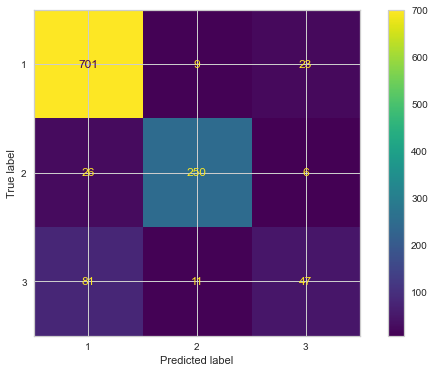

In [345]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred, average='weighted')
log_recall = recall_score(y_test, y_pred, average='weighted')
log_accuracy = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(log_model, X_test_scaled, y_test);

### Cross-Validating Logistic Regression Model

In [346]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

print("--------------------")
print(df_scores.mean()[2:])

--------------------
test_accuracy             0.8634903
test_precision_weighted   0.8484229
test_recall_weighted      0.8634903
test_f1_weighted          0.8492454
dtype: float64


### Modelling Logistic Regression with Best Parameters Using GridSeachCV

In [213]:
log_model = LogisticRegression(solver='saga', max_iter=500)

In [ ]:
# Logistic Regression
# param_grid = {"penalty" : ["l1", "l2", "elasticnet"],
#           "l1_ratio" : np.linspace(0, 1, 20),
#           "C" : np.logspace(0, 10, 20)}




In [ ]:
# model = GridSearchCV(LogisticRegression(random_state=42), 
#                      param_grid, 
#                      cv=10).fit(X_train_scaled, y_train)

In [ ]:
# y_test_pred = model.predict(X_test_scaled)

In [229]:
# y_pred = log_model_grid.predict(X_test_scaled)
# y_pred

In [347]:
log_tuned = LogisticRegression(solver='saga', 
                                     max_iter=5000, 
                                     penalty = "l2", 
                                     l1_ratio = 0.0, 
                                     C = 1000, random_state=42).fit(X_train_scaled,y_train)

In [348]:
y_pred = log_tuned.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [375]:
accuracy_score(y_test, y_pred)

0.8604852686308492

### Visualizing Logistic Regression Model

[[701   9  23]
 [ 26 250   6]
 [ 81  11  47]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.87      0.96      0.91       733
           2       0.93      0.89      0.91       282
           3       0.62      0.34      0.44       139

    accuracy                           0.86      1154
   macro avg       0.80      0.73      0.75      1154
weighted avg       0.85      0.86      0.85      1154



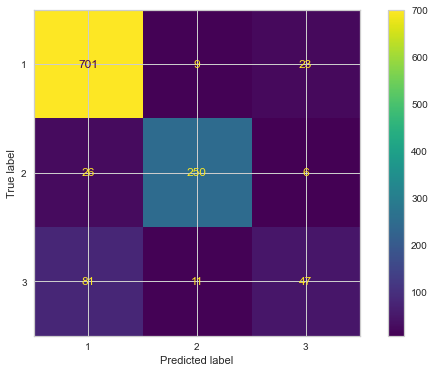

In [349]:
y_pred = log_tuned.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(log_tuned, X_test_scaled, y_test);

# 2. Support Vector Classifier

### Modelling Support Vector Machine (SVM) with Default Parameters

[[724   6   3]
 [ 34 245   3]
 [106  11  22]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.84      0.99      0.91       733
           2       0.94      0.87      0.90       282
           3       0.79      0.16      0.26       139

    accuracy                           0.86      1154
   macro avg       0.85      0.67      0.69      1154
weighted avg       0.86      0.86      0.83      1154



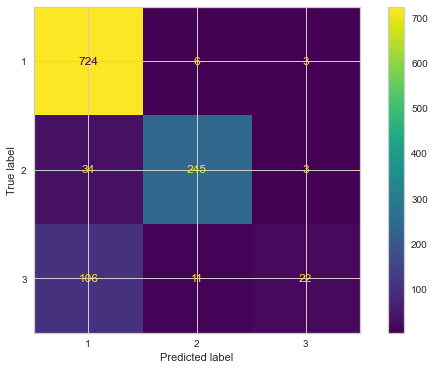

In [350]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred, average="weighted")
svc_recall = recall_score(y_test, y_pred, average="weighted")
#svc_auc = roc_auc_score(y_test, y_pred)
svc_accuracy = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model, X_test_scaled, y_test);

### Cross-Validating Support Vector Machine (SVM) Model

In [351]:
model = SVC(random_state=42)
scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

print("--------------------")
print(df_scores.mean()[2:])

--------------------
test_accuracy             0.8561226
test_precision_weighted   0.8432028
test_recall_weighted      0.8561226
test_f1_weighted          0.8225863
dtype: float64


### Modelling Support Vector Machine (SVM) with Best Parameters Using GridSeachCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

In [ ]:
model = SVC()

In [ ]:
SVM_model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [ ]:
#SVM_model_grid.fit(X_train_scaled, y_train)

In [ ]:
print(f"Best Parameters of GridgeSearchCV for SVM Model: {SVM_model_grid.best_params_}")
print("-------------------------------------------------------------------------------")
print(f"Best Estimator of GridgeSearchCV for SVM Model: {SVM_model_grid.best_estimator_}")

In [395]:
svm_tuned = SVC(C = 0.1, 
            gamma = 0.01, 
            kernel ='linear', random_state=42).fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

In [396]:
y_pred = svm_tuned.predict(X_test)

In [397]:
accuracy_score(y_test, y_pred)

0.6351819757365684

### Visualizing SVM Model

[[712  10  11]
 [ 30 247   5]
 [ 92  10  37]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.85      0.97      0.91       733
           2       0.93      0.88      0.90       282
           3       0.70      0.27      0.39       139

    accuracy                           0.86      1154
   macro avg       0.83      0.70      0.73      1154
weighted avg       0.85      0.86      0.84      1154



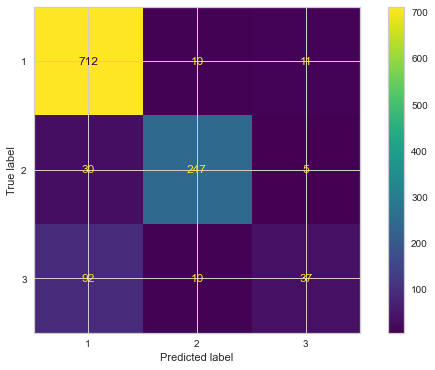

In [398]:
y_pred = svm_tuned.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_tuned, X_test_scaled, y_test);

# 3. Random Forest

### Modelling Random Forest with Default Parameters

[[721  11   1]
 [ 79 201   2]
 [120  15   4]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.78      0.98      0.87       733
           2       0.89      0.71      0.79       282
           3       0.57      0.03      0.05       139

    accuracy                           0.80      1154
   macro avg       0.75      0.58      0.57      1154
weighted avg       0.78      0.80      0.75      1154



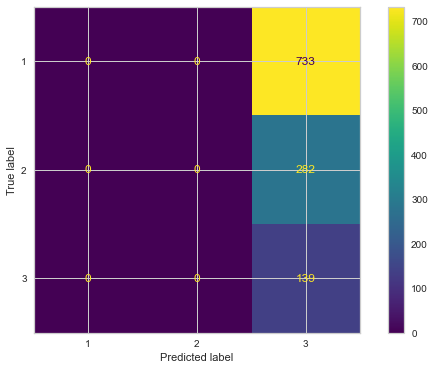

In [352]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='weighted')
#rf_auc = roc_auc_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_model, X_test_scaled, y_test);

### Cross-Validating Random Forest Model

In [353]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

print("--------------------")
print(df_scores.mean()[2:])

--------------------
test_accuracy             0.8223164
test_precision_weighted   0.8125649
test_recall_weighted      0.8223164
test_f1_weighted          0.7768416
dtype: float64


### Modelling Random Forest with Best Parameters Using GridSeachCV

In [178]:
rf = RandomForestClassifier(random_state=42)

In [179]:
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [180]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [181]:
rf_cv_model.best_params_

{'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}

In [354]:
rf_tuned = RandomForestClassifier(max_features = 8, 
                                  min_samples_split = 2, 
                                  n_estimators = 1000).fit(X_train, y_train)

In [355]:
y_pred = rf_tuned.predict(X_test)

In [356]:
accuracy_score(y_test, y_pred)

0.8128249566724437

### Visualizing Random Forest Model

[[720  11   2]
 [ 69 212   1]
 [120  13   6]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.79      0.98      0.88       733
           2       0.90      0.75      0.82       282
           3       0.67      0.04      0.08       139

    accuracy                           0.81      1154
   macro avg       0.79      0.59      0.59      1154
weighted avg       0.80      0.81      0.77      1154



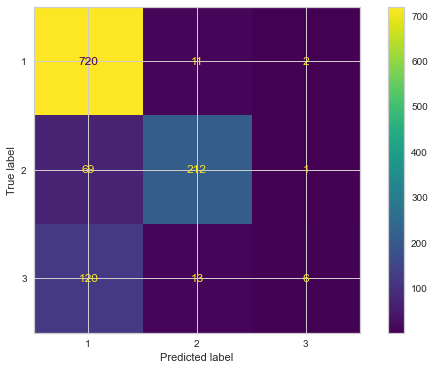

In [357]:
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_tuned, X_test, y_test);

# 4. XGBoost

### Model Performance with Default Parameters

[17:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[711  16   6]
 [ 40 241   1]
 [ 94  15  30]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.84      0.97      0.90       733
           2       0.89      0.85      0.87       282
           3       0.81      0.22      0.34       139

    accuracy                           0.85      1154
   macro avg       0.85      0.68      0.70      1154
weighted avg       0.85      0.85      0.83      1154



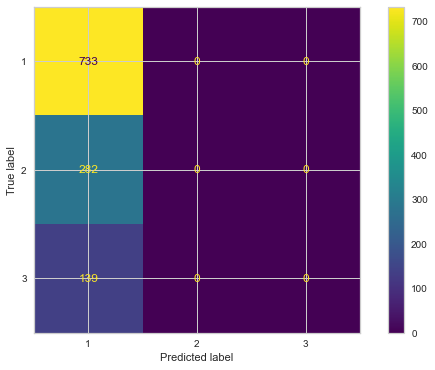

In [358]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
xgb_f1 = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
#xgb_auc = roc_auc_score(y_test, y_pred, average='macro', multi_class="ovr")
xgb_accuracy = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_model, X_test_scaled, y_test);

### Cross-Validating XGBoost Model

In [359]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

print("--------------------")
print(df_scores.mean()[2:])

[17:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

### Modelling XGBoost with Best Parameters Using GridSeachCV

In [185]:
xgb = XGBClassifier()

In [186]:
xgb_params = {"n_estimators": [100, 500, 1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.001,0.01]}

In [187]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[12:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [189]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.8}

In [360]:
xgb_tuned = xgb = XGBClassifier(learning_rate= 0.1, 
                                max_depth= 5, 
                                n_estimators= 1000, 
                                subsample= 0.8).fit(X_train, y_train)

[17:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [361]:
y_pred = xgb_tuned.predict(X_test)

In [362]:
accuracy_score(y_test,y_pred)

0.8604852686308492

### Visualizing XGBoost Model

[[712  16   5]
 [ 34 245   3]
 [ 89  14  36]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.85      0.97      0.91       733
           2       0.89      0.87      0.88       282
           3       0.82      0.26      0.39       139

    accuracy                           0.86      1154
   macro avg       0.85      0.70      0.73      1154
weighted avg       0.86      0.86      0.84      1154



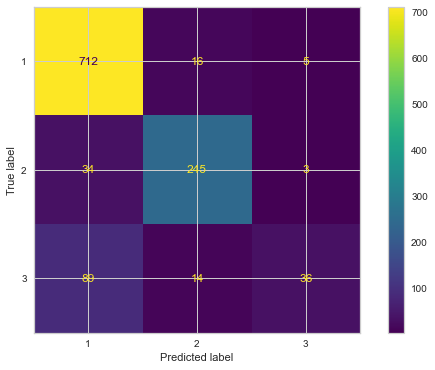

In [363]:
y_pred = xgb_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_tuned, X_test, y_test);

# Comparison of all models

In [399]:
modeller = [
    log_tuned,
    svm_tuned,
    rf_tuned,
    xgb_tuned]

sonuc = []
sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

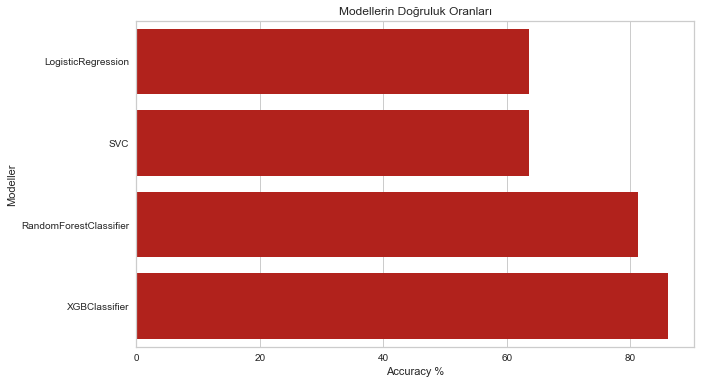

In [400]:
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

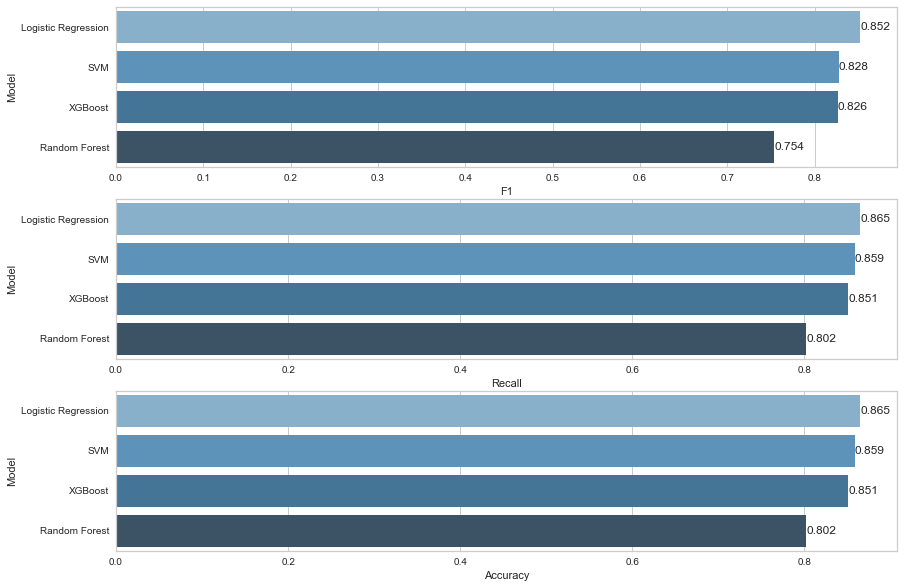

In [401]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
                        "F1": [log_f1, svc_f1, rf_f1, xgb_f1],
                        "Recall": [log_recall, svc_recall, rf_recall, xgb_recall],
                        "Accuracy": [log_accuracy, svc_accuracy, rf_accuracy, xgb_accuracy]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Choose the best model based on the metric you choose and make a random prediction

In [403]:
scaler = StandardScaler().fit(X)

In [404]:
X_scaled = scaler.transform(X)

In [405]:
final_model = LogisticRegression().fit(X_scaled, y)
final_model

LogisticRegression()

In [407]:
samples = df.sample(5)
X_samples = samples.drop("dodrace", axis=1)
y_samples = samples["dodrace"]

In [409]:
predictions = final_model.predict(X_samples)
predictions_proba = final_model.predict_proba(X_samples)

samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,calfcircumference,chestbreadth,chestcircumference,chestdepth,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,functionalleglength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadthsitting,interpupillarybreadth,interscyei,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,overheadfingertipreachsitting,palmlength,shoulderlength,sleevelengthspinewrist,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistfrontlengthsitting,wristcircumference,dodrace,gender_Male,pred,pred_proba
4173,184,1346,316,196,219,175,361,274,271,420,68,280,266,127,945,209,821,565,354,262,852,216,605,362,35,62,22,253,777,313,1052,75,176,148,536,178,295,62,381,565,346,437,58,366,112,304,1334,105,134,784,152,760,121,1521,425,271,332,152,3,0,1,0.0000000
2,287,1430,341,230,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,412,288,1120,267,636,359,40,61,23,237,810,355,1115,93,203,148,573,202,356,70,393,665,462,482,72,409,123,403,1447,121,167,910,198,807,125,1678,472,329,411,180,2,1,1,0.0000000
3798,272,1500,343,240,256,209,417,355,273,533,76,323,311,146,1038,265,937,654,404,303,1078,255,684,366,34,60,21,267,821,351,1131,91,183,157,569,197,357,72,390,610,465,503,71,422,129,403,1438,114,136,921,183,836,136,1727,472,315,393,180,1,1,1,0.0000000
134,264,1492,344,267,274,208,440,368,302,539,81,358,344,141,1109,269,923,633,426,310,1082,248,733,402,37,70,24,261,835,363,1164,95,206,153,596,212,375,71,423,600,446,519,80,450,133,442,1513,126,149,929,200,821,132,1772,440,359,392,186,1,1,1,0.0000000
3491,282,1351,306,240,262,198,411,389,269,492,80,337,315,137,1016,257,862,587,423,252,994,257,600,326,39,65,25,222,744,341,1051,87,194,153,587,207,358,80,380,650,393,469,69,412,121,408,1314,119,144,874,189,751,132,1632,446,303,369,184,2,1,1,0.0000000


---
---